## Bankruptcy prediction using machine learning techniques 

Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=4)
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score , confusion_matrix
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/trejoalcantazo/Thesis-bankruptcy-prediction-ML-DL/main/data.csv')
df.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


Check for missing data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Companies in bankrupcty

In [4]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

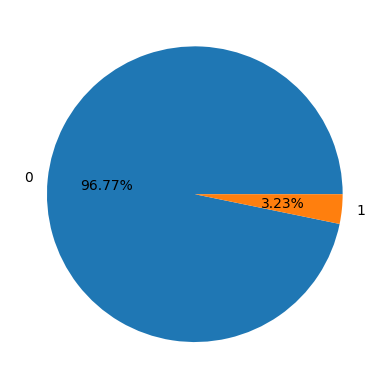

In [5]:
data = df["Bankrupt?"].value_counts()
plt.pie(data,autopct='%1.2f%%',labels=data.index)
plt.show()

Processing data

In [6]:
X = df.copy() 

y = df['Bankrupt?']

X = X.drop(['Bankrupt?'], axis=1)

In [7]:
X.columns

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate'

Splitting data for train and test

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

Balance data

In [9]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=1234)

X_smote, y_smote = sm.fit_resample(X_train, y_train)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_smote.shape}''')

print('\nBalance of positive and negative classes (%):')
y_smote.value_counts(normalize=True) * 100

Shape of X before SMOTE: (6819, 95)
Shape of X after SMOTE: (10550, 95)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Bankrupt?, dtype: float64

Feature Scalling

In [10]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()

#X_smote = sc.fit_transform(X_smote)
#X_test = sc.transform(X_test)

In [11]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.4 MB/s eta 0:00:00


In [12]:
# Import ML Libraries
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

classifiers = [[CatBoostClassifier(verbose=0),'CatBoost Classifier'],[XGBClassifier(),'XGB Classifier'], [RandomForestClassifier(),'Random Forest'], 
    [KNeighborsClassifier(), 'K-Nearest Neighbours'], [SGDClassifier(),'SGD Classifier'], [SVC(),'SVC'],[LGBMClassifier(),'LGBM Classifier'],
              [GaussianNB(),'GaussianNB'],[DecisionTreeClassifier(),'Decision Tree Classifier'],[LogisticRegression(),'Logistic Regression']]


Predicting

In [13]:
for cls in classifiers:
    model = cls[0]
    model.fit(X_smote, y_smote)
    
    y_pred = model.predict(X_test)
    print(cls[1])
    print ('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)
    print("Recall : ", recall_score(y_test, y_pred) *  100)
    print("Precision : ", precision_score(y_test, y_pred) *  100)
    print("F1 : ", f1_score(y_test, y_pred) *  100)
    print("\n\n\n")

CatBoost Classifier
Confusion Matrix:
[[1295   29]
 [  19   21]]
Accuracy :  96.48093841642229
Recall :  52.5
Precision :  42.0
F1 :  46.666666666666664




XGB Classifier
Confusion Matrix:
[[1297   27]
 [  18   22]]
Accuracy :  96.7008797653959
Recall :  55.00000000000001
Precision :  44.89795918367347
F1 :  49.43820224719101




Random Forest
Confusion Matrix:
[[1284   40]
 [  19   21]]
Accuracy :  95.67448680351906
Recall :  52.5
Precision :  34.42622950819672
F1 :  41.584158415841586




K-Nearest Neighbours
Confusion Matrix:
[[1124  200]
 [  20   20]]
Accuracy :  83.87096774193549
Recall :  50.0
Precision :  9.090909090909092
F1 :  15.384615384615385




SGD Classifier
Confusion Matrix:
[[1190  134]
 [  33    7]]
Accuracy :  87.7565982404692
Recall :  17.5
Precision :  4.964539007092199
F1 :  7.734806629834254




SVC
Confusion Matrix:
[[1045  279]
 [  23   17]]
Accuracy :  77.85923753665689
Recall :  42.5
Precision :  5.743243243243244
F1 :  10.119047619047619




LGBM Classifier

With feature Scaling:

For Best Accuracy : LGBM Classifier (acc : 96.7008797653959)

For Best Recall : GaussianNB (recall: 90.0)

For Best Precision : LGBM Classifier (Precision: 44.89795918367347)

For Best F1 : LGBM Classifier (F1: 49.43820224719101)

Without Feature Scaling:

For Best Accuracy : XGB Classifier (acc : 96.7008797653959)
For Best Recall : GaussianNB (recall: 95.0)

For Best Precision : XGB Classifier (Precision: 44.89795918367347)

For Best F1 : XGB Classifier (F1: 49.43820224719101)